In [2]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [3]:
import matplotlib.pyplot as plt

In [29]:
df=pd.read_csv('indian_liver_patient.csv')

In [30]:
df.shape

(583, 11)

In [31]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [32]:
df.head()


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


<AxesSubplot:xlabel='Dataset', ylabel='count'>

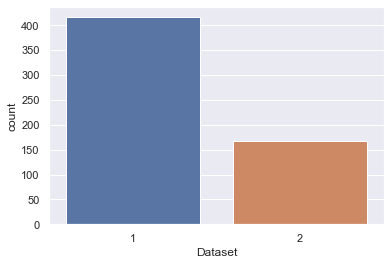

In [33]:
sns.set_theme(style="darkgrid")
sns.countplot(x=df['Dataset'])

In [34]:
df.Dataset.value_counts()

1    416
2    167
Name: Dataset, dtype: int64

1--> Patient <br>
2--> Not a Patient<br>


In [35]:
#number of unique values in all the features 
df.nunique()

Age                            72
Gender                          2
Total_Bilirubin               113
Direct_Bilirubin               80
Alkaline_Phosphotase          263
Alamine_Aminotransferase      152
Aspartate_Aminotransferase    177
Total_Protiens                 58
Albumin                        40
Albumin_and_Globulin_Ratio     69
Dataset                         2
dtype: int64

In [36]:
df.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

<AxesSubplot:>

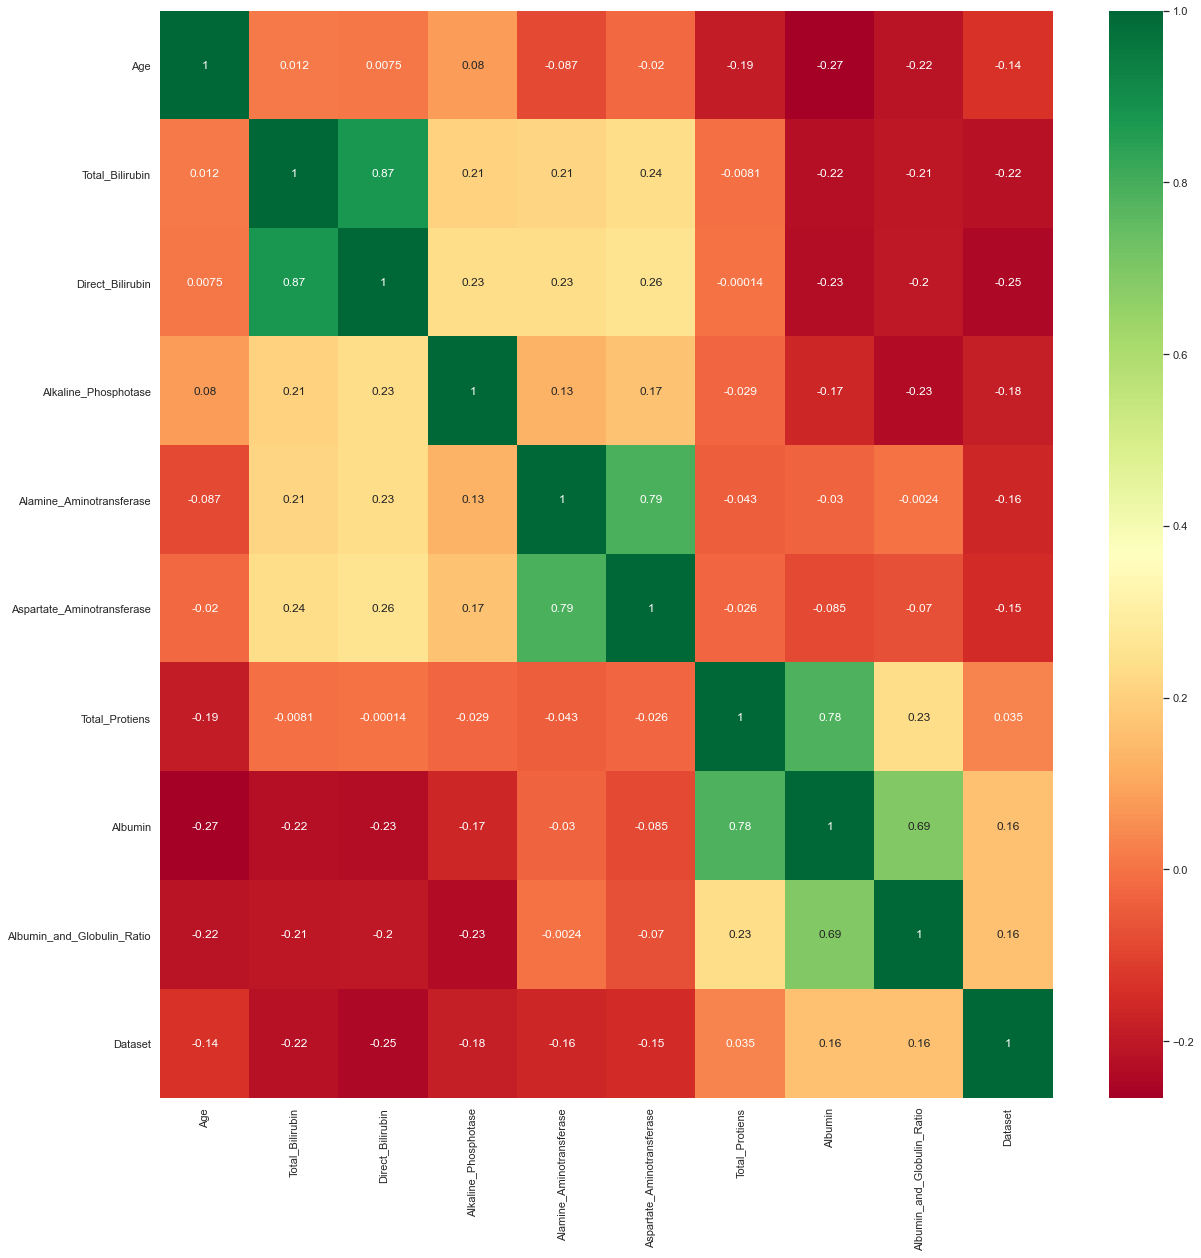

In [37]:
#finding correlation between different features 
corr_matrix=df.corr()
corr_index_features=corr_matrix.index
plt.figure(figsize=(20,20))
sns.heatmap(data=df[corr_index_features].corr(),annot=True,cmap='RdYlGn')

as one can observe from the above dataset the dataset is mostly negatively correlated 

#finding null values in the data 

In [38]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

there are four null values in the Albumin_and_Globulin_Ratio since the data type is of float so we will be imputing the missing data with mean value of the feature 


In [39]:
mean=df['Albumin_and_Globulin_Ratio'].mean()

In [40]:
mean

0.9470639032815197

In [43]:
df['Albumin_and_Globulin_Ratio'].replace(np.nan,value=mean,inplace=True)

In [44]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

we have removed all the null values from the dataset 


In [45]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

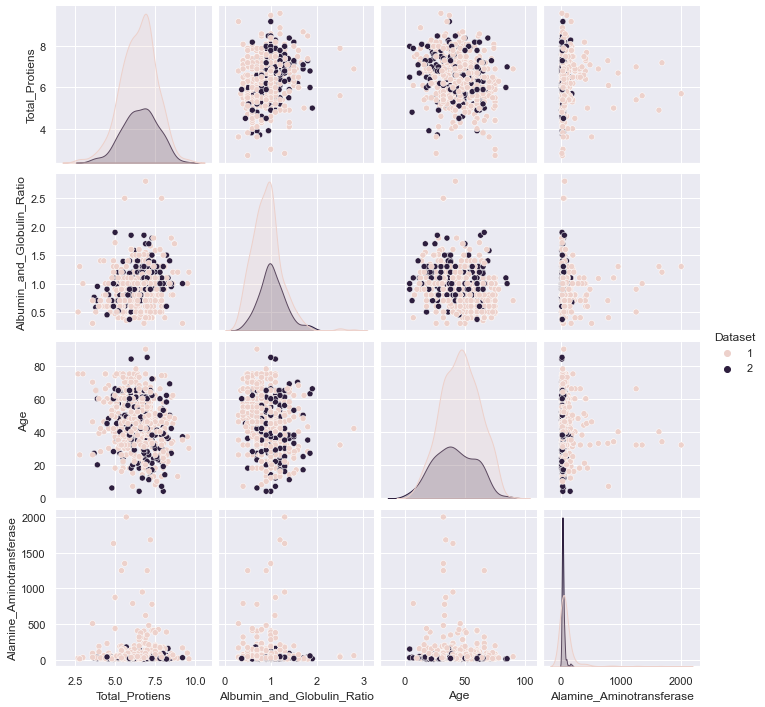

In [50]:
sns.pairplot(df, hue="Dataset", vars = ["Total_Protiens", "Albumin_and_Globulin_Ratio", "Age",'Alamine_Aminotransferase'])
plt.show()

In [51]:
y=df['Dataset']
df.drop(columns=['Dataset'],inplace=True)

In [52]:
print(df.shape)
print(y.shape)

(583, 10)
(583,)


In [63]:
df['Gender'].value_counts()
gender_map={'Male':1,'Female':0}
df['Gender']=df['Gender'].map(gender_map)

## Applying machine learning algorithm on dataset 

#### 1. K- Nearest Neighbors :



In [84]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df=sc.fit_transform(df)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df,y,stratify=y,random_state=42,test_size=0.2)

In [85]:
type(x_train)

numpy.ndarray

In [86]:
neighbors_score=[]
for i in range(1,21):
    kclassifier=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(kclassifier,x_train,y_train,cv=5)
    neighbors_score.append(score.mean())

In [87]:
score.mean()

0.7210706932052163

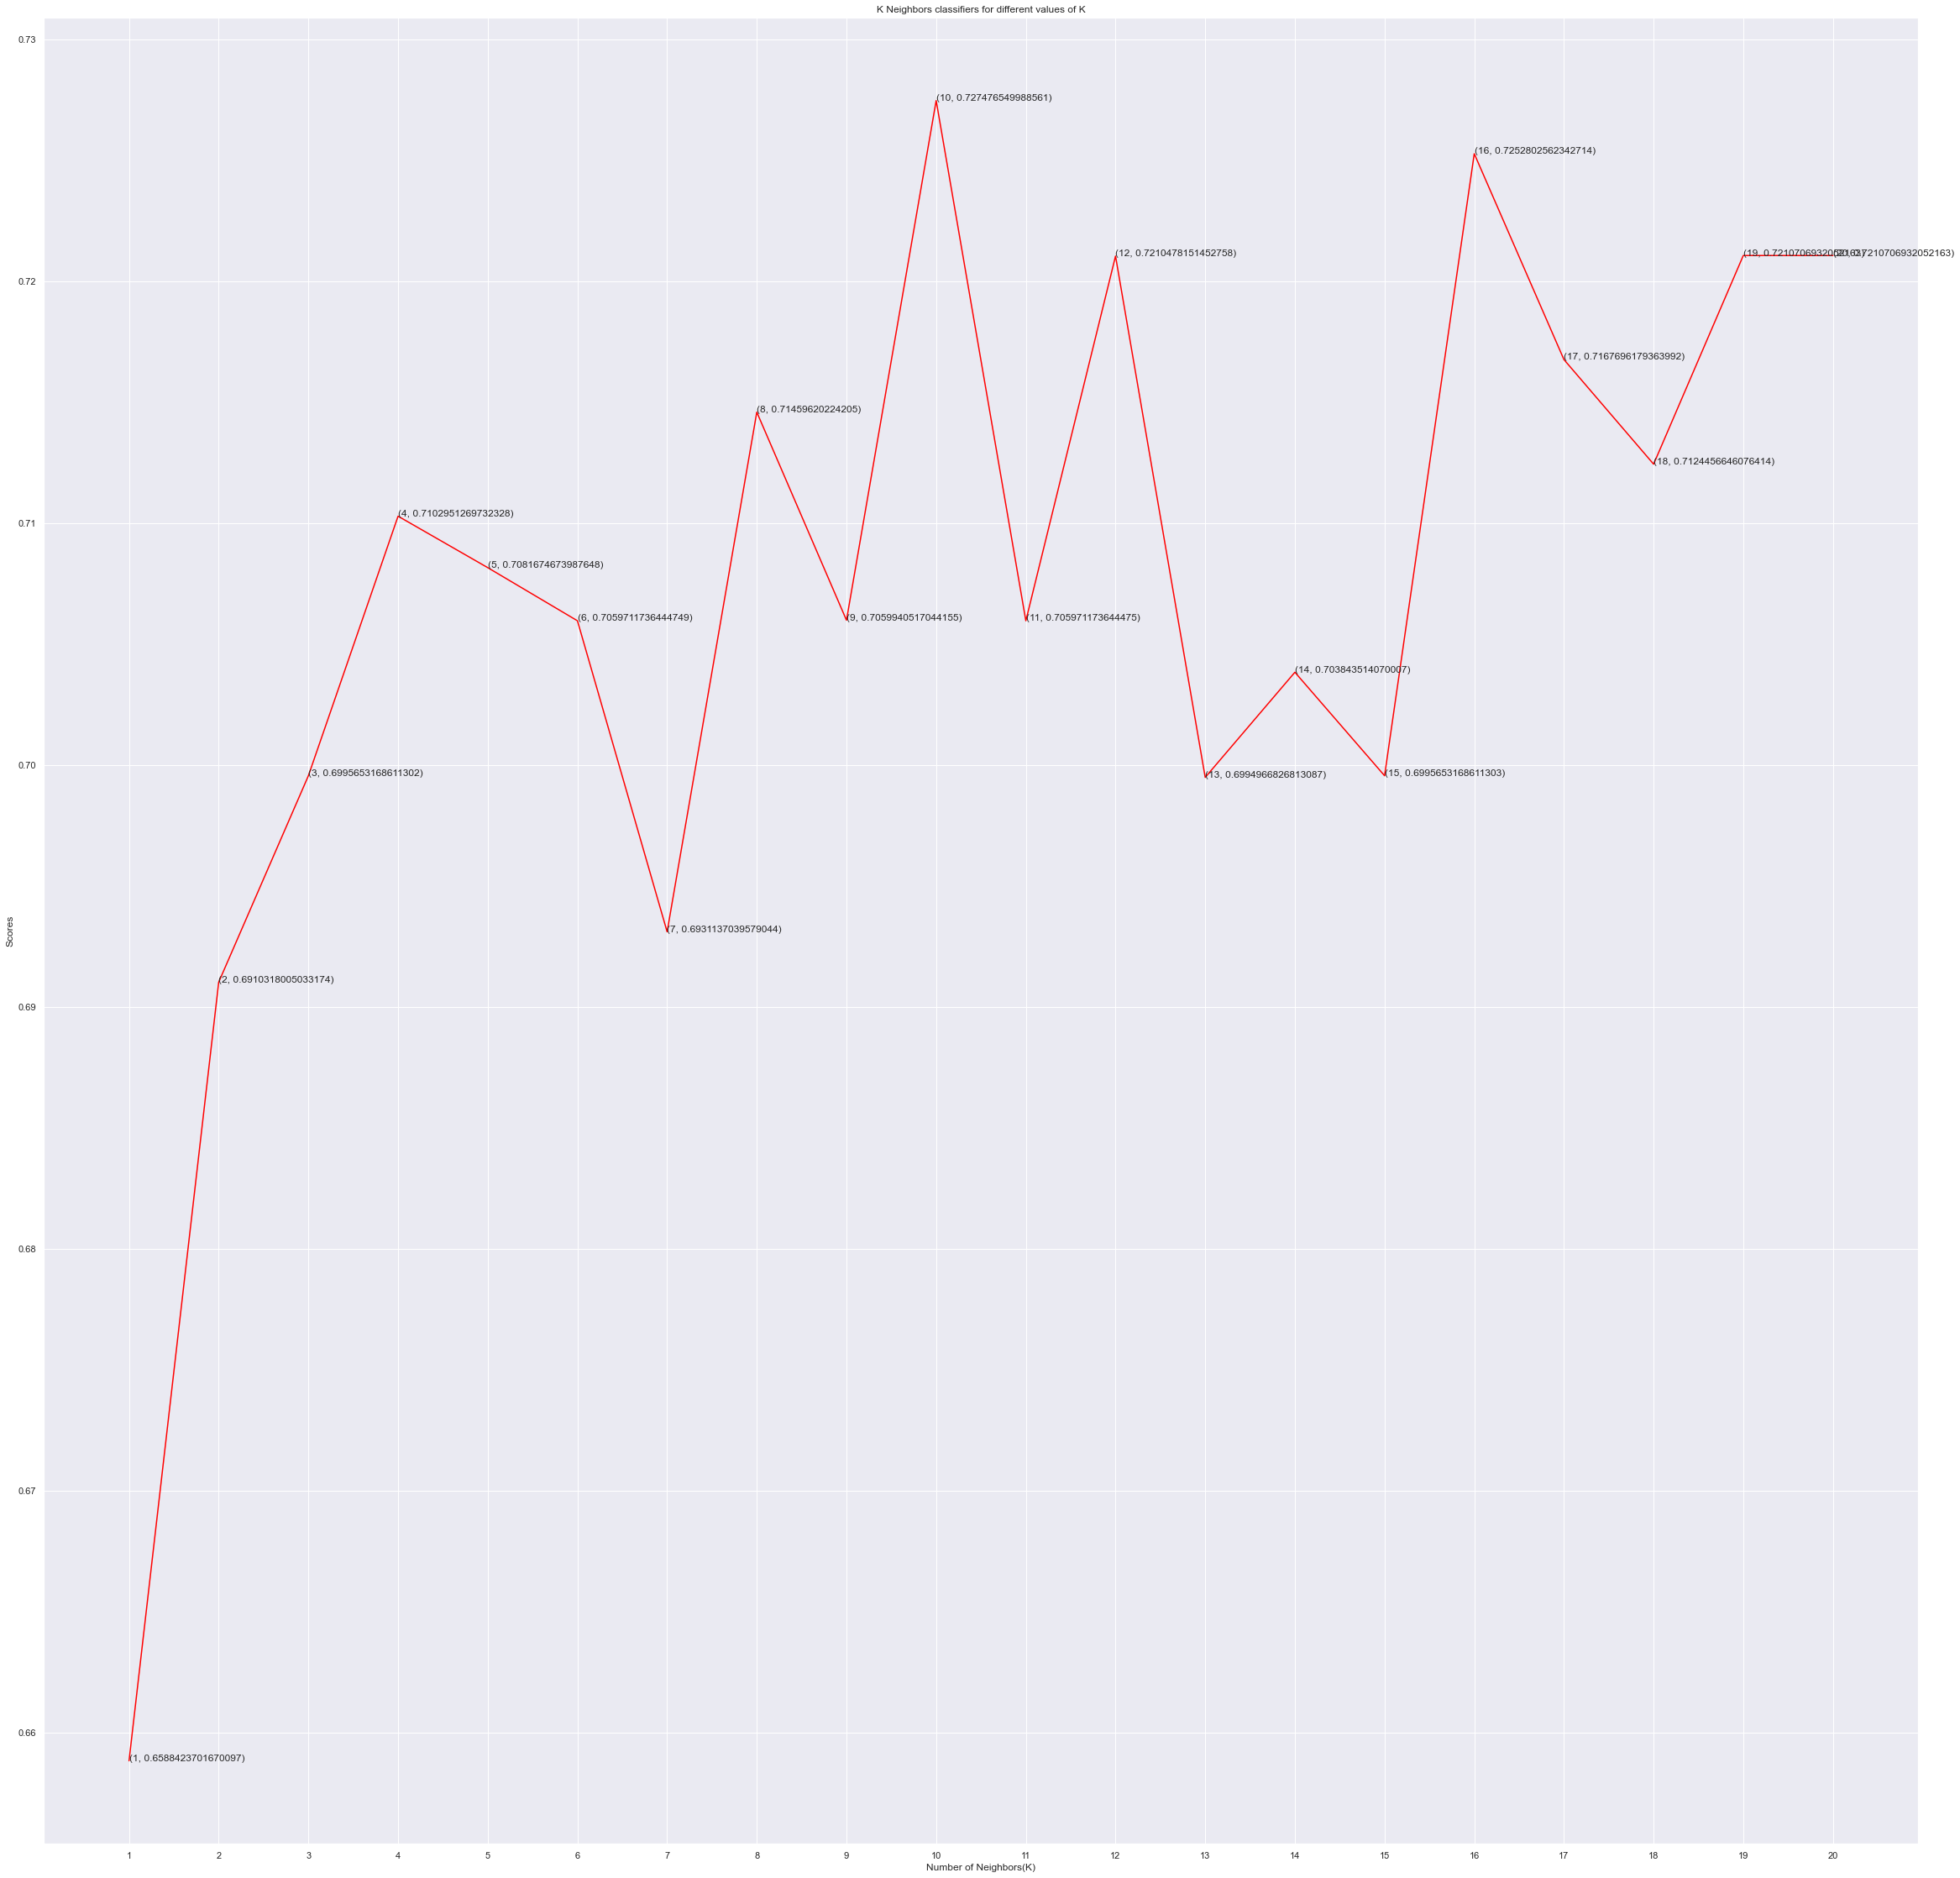

In [88]:
plt.figure(figsize=(40,40))
plt.plot([k for k in range(1,21)],neighbors_score,color='red')
for i in range(1,21):
    plt.text(i,neighbors_score[i-1],(i,neighbors_score[i-1]))
plt.xticks([i for i in range(1,21)])
plt.xlabel('Number of Neighbors(K)')
plt.ylabel('Scores')


plt.title('K Neighbors classifiers for different values of K')
plt.savefig('KNN.png')

In [90]:
np.argmax(score)

1

we have the highest accuracy with k nearest neighbors when we have the number of neighbors equal to 1


In [108]:
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train,y_train)
score=cross_val_score(knn,x_train,y_train,cv=5)
from sklearn.metrics import accuracy_score
print("cross validation accuracy : ",score.mean())
print("testing accuracy :  ",accuracy_score(knn.predict(x_test),y_test))

cross validation accuracy :  0.7059711736444749
testing accuracy :   0.6837606837606838


In [109]:
from joblib import load, dump
dump(knn,'KNN_68.joblib')

['KNN_68.joblib']

In [110]:
pred_train_score=accuracy_score(knn.predict(x_train),y_train)
pred_test_score=accuracy_score(knn.predict(x_test),y_test)
acc=np.zeros((2,7))
acc[0][0]=pred_train_score
acc[1][0]=pred_test_score

## Logistic Regression

In [111]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(x_train, y_train)
score=cross_val_score(log,x_train,y_train,cv=5)
print("cross validation accuracy : ",score.mean())
print("testing accuracy : ",accuracy_score(log.predict(x_test),y_test))

cross validation accuracy :  0.7102264927934112
testing accuracy :  0.6923076923076923


without hyperparameter tuning logistic regression is giving an accuracy of 69% lets find out accuracy after applying hyperparameter tuning 


In [112]:
logModel=LogisticRegression()

param_grid=[{'penalty':['l1','l2','elasticnet','none'],
            'C':np.logspace(-4,4,20),
            'solver':['lbfgs','newton-cg','liblinear','sag','saga'],
            'max_iter':[100,1000,2500,5000]}]


Log_clf=GridSearchCV(logModel,param_grid=param_grid,cv=5,verbose=True,n_jobs=-1)
Log_best_clf=Log_clf.fit(x_train,y_train)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 1680 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 5666 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 8000 out of 8000 | elapsed:   41.5s finished


In [114]:
Log_best_clf.best_estimator_

LogisticRegression(C=11.288378916846883, max_iter=2500, penalty='l1',
                   solver='saga')

In [116]:
print("training accuracy : ",Log_best_clf.score(x_train,y_train))
print("Testing accuracy : ",accuracy_score(Log_best_clf.predict(x_test),y_test))

training accuracy :  0.7339055793991416
Testing accuracy :  0.6923076923076923


In [117]:
pred_train_score=accuracy_score(Log_best_clf.predict(x_train),y_train)
pred_test_score=accuracy_score(Log_best_clf.predict(x_test),y_test)
acc[0][1]=pred_train_score
acc[1][1]=pred_test_score
dump(Log_best_clf,'logistic_regression_69.joblib')

['logistic_regression_69.joblib']

## Applying Support Vector Classifier 

In [118]:
svc=SVC()
svc.fit(x_train,y_train)
score=cross_val_score(svc,x_train,y_train,cv=5)
print("cross validation accuracy : ",score.mean())
print("testing accuracy : ",accuracy_score(svc.predict(x_test),y_test))

cross validation accuracy :  0.7102951269732328
testing accuracy :  0.6923076923076923


Before applying hyperparameter tuning we have an accuracy of 69% 


In [123]:
#applying hyperparameter tuning in support vector machines :

svc_model=SVC(gamma='auto')
param_grid={'C':[0.1,1,10,100],
           'gamma':[1,0.1,0.01,0.001],
           'kernel':['rbf']}

from sklearn.model_selection import RandomizedSearchCV

SV_grid=GridSearchCV(estimator=svc_model,param_grid=param_grid,cv=5,verbose=2,n_jobs=4)


SV_grid.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  65 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    0.1s finished


GridSearchCV(cv=5, estimator=SVC(gamma='auto'), n_jobs=4,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=2)

In [124]:
SV_grid.best_params_


{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [125]:
print("training accuracy : ",SV_grid.score(x_train,y_train))
print("Testing accuracy : ",accuracy_score(SV_grid.predict(x_test),y_test))

training accuracy :  0.8562231759656652
Testing accuracy :  0.7264957264957265


as it can be seen when we apply hyper parameter tunning the model is clearly underfitting so we will be using the model with trainning accuracy 72% and testing accuracy 69%.


In [126]:
print("training accuracy : ",svc.score(x_train,y_train))
print("Testing accuracy : ",accuracy_score(svc.predict(x_test),y_test))
pred_train_score=accuracy_score(svc.predict(x_train),y_train)
pred_test_score=accuracy_score(svc.predict(x_test),y_test)
acc[0][2]=pred_train_score
acc[1][2]=pred_test_score

training accuracy :  0.723175965665236
Testing accuracy :  0.6923076923076923


In [128]:
dump(svc,'Liver_SVC_69.joblib')

['Liver_SVC_69.joblib']

## Applying Decision Tree;

In [129]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
score=cross_val_score(dt,x_train,y_train,cv=5)
print("cross validation accuracy ",score.mean())
print("testing accuracy ",accuracy_score(dt.predict(x_test),y_test))

cross validation accuracy  0.6630748112560054
testing accuracy  0.5555555555555556


In [130]:
dt_model=DecisionTreeClassifier()
param_grid={'max_depth':(10,30,50,70,90,100),
           'criterion':('gini','entropy'),
           'max_depth':(3,5,7,9,10),
           'max_features':('auto','sqrt','log2'),
           'min_samples_split':(2,4,6)}
DT_grid_cv=GridSearchCV(dt_model,param_grid=param_grid,cv=5,verbose=True)
DT_grid_cv.fit(x_train,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.6s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': (3, 5, 7, 9, 10),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'min_samples_split': (2, 4, 6)},
             verbose=True)

In [132]:
print(DT_grid_cv.estimator)
print(DT_grid_cv.best_params_)

DecisionTreeClassifier()
{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 6}


In [133]:
print("training accuracy :",DT_grid_cv.score(x_train,y_train))
print("testing acccuracy : ",accuracy_score(DT_grid_cv.predict(x_test),y_test))

training accuracy : 0.7639484978540773
testing acccuracy :  0.7008547008547008


with hyperparamete tuning we have accuracy around 70%.

In [135]:
pred_train_score=accuracy_score(DT_grid_cv.predict(x_train),y_train)
pred_test_score=accuracy_score(DT_grid_cv.predict(x_test),y_test)
acc[0][3]=pred_train_score
acc[1][3]=pred_test_score

In [136]:
dump(DT_grid_cv,'DecisionTree_70.joblib')

['DecisionTree_70.joblib']

### Applying random Forest : 

In [137]:
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)
score=cross_val_score(rf_model,x_train,y_train,cv=5)
print("training accuracy : ",score.mean())
print("testing acccuracy : ",accuracy_score(rf_model.predict(x_test),y_test))

training accuracy :  0.7060169297643561
testing acccuracy :  0.6324786324786325


In [138]:
#aaplying hyperparameter tuning 

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf_Model = RandomForestClassifier()
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)
rf_Grid.fit(x_train,y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    3.2s
[Parallel(n_jobs=4)]: Done 264 tasks      | elapsed:    9.1s
[Parallel(n_jobs=4)]: Done 670 tasks      | elapsed:   19.4s
[Parallel(n_jobs=4)]: Done 953 out of 960 | elapsed:   27.9s remaining:    0.1s
[Parallel(n_jobs=4)]: Done 960 out of 960 | elapsed:   28.2s finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [141]:
print("training accuracy :",rf_Grid.score(x_train,y_train))
print("testing acccuracy : ",accuracy_score(rf_Grid.predict(x_test),y_test))

training accuracy : 0.7982832618025751
testing acccuracy :  0.6837606837606838


with  hyperparamete tuning we have an accuracy of 68% with us 

In [142]:
pred_train_score=accuracy_score(rf_Grid.predict(x_train),y_train)
pred_test_score=accuracy_score(rf_Grid.predict(x_test),y_test)
acc[0][4]=pred_train_score
acc[1][4]=pred_test_score

In [143]:
dump(rf_Grid,'Random_forest_68.joblib')

['Random_forest_68.joblib']

## Naive Bayes 

In [144]:
from sklearn.naive_bayes import GaussianNB

clf=GaussianNB()
clf.fit(x_train,y_train)
scores = cross_val_score(clf, x_train, y_train, cv=10)
print("training accuracy with Naive Bayes  : ",scores.mean())
print("testing Accuracy with Nayive Bayes: ", accuracy_score(clf.predict(x_test),y_test))

training accuracy with Naive Bayes  :  0.5642460684551341
testing Accuracy with Nayive Bayes:  0.5384615384615384


In [145]:
pred_train_score=accuracy_score(clf.predict(x_train),y_train)
pred_test_score=accuracy_score(clf.predict(x_test),y_test)
acc[0][5]=pred_train_score
acc[1][5]=pred_test_score

In [146]:
dump(clf,'Naive_53.joblib')

['Naive_53.joblib']

In [148]:
new_acc=np.zeros((2,6))
for i in range(0,6):
    new_acc[0][i]=acc[0][i]
    new_acc[1][i]=acc[1][i]
    

In [150]:
acc=new_acc

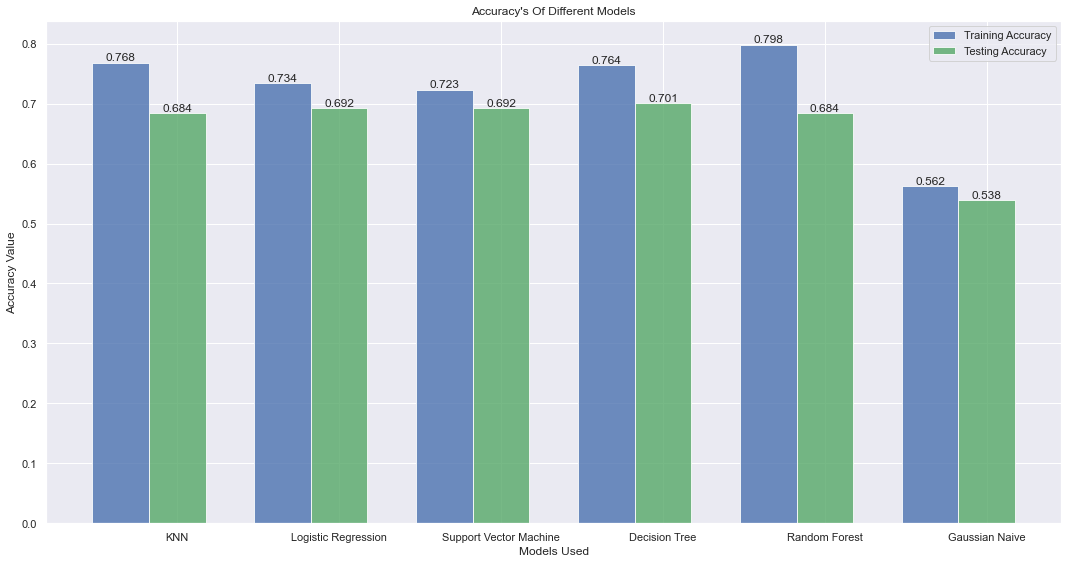

<Figure size 432x288 with 0 Axes>

In [151]:
n_groups = 6
acc_trn = acc[0]
acc_tst = acc[1]

# create plot
plt.figure(figsize=(15,8))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
def display_percentage(bars):
    for graph in bars:
        height = graph.get_height()
        plt.text(graph.get_x() + graph.get_width()/2., height,'%.3f' %float(round(height,3)),ha='center', va='bottom')

train_bar = plt.bar(index, acc_trn, bar_width,alpha=opacity,color='b',label='Training Accuracy')
display_percentage(train_bar)

test_bar = plt.bar(index + bar_width, acc_tst, bar_width,alpha=opacity,color='g',label='Testing Accuracy')
display_percentage(test_bar)
plt.xticks(index + bar_width, ('KNN','Logistic Regression', 'Support Vector Machine', 'Decision Tree','Random Forest','Gaussian Naive'))

plt.xlabel('Models Used')
plt.ylabel('Accuracy Value')
plt.title("Accuracy's Of Different Models")
plt.legend()

plt.tight_layout()
plt.show()
plt.savefig('Accuracy.jpg')

Above figure shows different accuracy bars for differnt algorithms 